In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
train_df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [4]:
train_df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [5]:
type(train_df.isnull().sum())

pandas.core.series.Series

In [6]:
pd.set_option('display.max_rows', None)
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# #Proccecing NaN

# LotFrontage median
train_df['LotFrontage'].fillna(train_df['LotFrontage'].dropna().median(), inplace=True)
test_df['LotFrontage'].fillna(test_df['LotFrontage'].dropna().median(), inplace=True)

# Alley 2
train_df['Alley'].fillna('Na', inplace=True)
test_df['Alley'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['Alley'] = dataset['Alley'].map({'Grvl': 0, 'Pave': 1, 'Na': 2})

# MasVnrType freq
# MasVnrArea 0(freq)
freq_MasVnrType = train_df.MasVnrType.dropna().mode()[0]
for dataset in combine:
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna(freq_MasVnrType)
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0).astype(int)

# BsmtQual 5
train_df['BsmtQual'].fillna('Na', inplace=True)
test_df['BsmtQual'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['BsmtQual'] = dataset['BsmtQual'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'Na': 5})

# BsmtCond 5
train_df['BsmtCond'].fillna('Na', inplace=True)
test_df['BsmtCond'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['BsmtCond'] = dataset['BsmtCond'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'Na': 5})

# BsmtExposure 4
train_df['BsmtExposure'].fillna('Na', inplace=True)
test_df['BsmtExposure'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['BsmtExposure'] = dataset['BsmtExposure'].map({'Gd': 0, 'Av': 1, 'Mn': 2, 'No': 3, 'Na': 4})

# BsmtFinType1 6
train_df['BsmtFinType1'].fillna('Na', inplace=True)
test_df['BsmtFinType1'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['BsmtFinType1'] = dataset['BsmtFinType1'].map({'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5, 'Na': 6})
    
# BsmtFinType2 6
train_df['BsmtFinType2'].fillna('Na', inplace=True)
test_df['BsmtFinType2'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['BsmtFinType2'] = dataset['BsmtFinType2'].map({'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5, 'Na': 6})
    
# Electrical freq
freq = train_df.Electrical.dropna().mode()[0]
for dataset in combine:
    dataset['Electrical'] = dataset['Electrical'].fillna(freq)
    
# FireplaceQu 5
train_df['FireplaceQu'].fillna('Na', inplace=True)
test_df['FireplaceQu'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['FireplaceQu'] = dataset['FireplaceQu'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'Na': 5})
    
# GarageType 6
train_df['GarageType'].fillna('Na', inplace=True)
test_df['GarageType'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['GarageType'] = dataset['GarageType'].map({'2Types': 0, 'Attchd': 1, 'Basment': 2, 'BuiltIn': 3, 'CarPort': 4, 'Detchd': 5, 'Na': 6})
    
# GarageYrBlt median
train_df['GarageYrBlt'].fillna(int(train_df['GarageYrBlt'].dropna().median()), inplace=True)
test_df['GarageYrBlt'].fillna(int(test_df['GarageYrBlt'].dropna().median()), inplace=True)

# GarageFinish 3
train_df['GarageFinish'].fillna('Na', inplace=True)
test_df['GarageFinish'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['GarageFinish'] = dataset['GarageFinish'].map({'Fin': 0, 'RFn': 1, 'Unf': 2, 'Na': 3})
    
# GarageQual 5
train_df['GarageQual'].fillna('Na', inplace=True)
test_df['GarageQual'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['GarageQual'] = dataset['GarageQual'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'Na': 5})
    
# GarageCond 5
train_df['GarageCond'].fillna('Na', inplace=True)
test_df['GarageCond'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['GarageCond'] = dataset['GarageCond'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'Na': 5})
    
# PoolQC 4
train_df['PoolQC'].fillna('Na', inplace=True)
test_df['PoolQC'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['PoolQC'] = dataset['PoolQC'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Na': 4})
    
# Fence 4
train_df['Fence'].fillna('Na', inplace=True)
test_df['Fence'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['Fence'] = dataset['Fence'].map({'GdPrv': 0, 'MnPrv': 1, 'GdWo': 2, 'MnWw': 3, 'Na': 4})
    
# MiscFeature 5
train_df['MiscFeature'].fillna('Na', inplace=True)
test_df['MiscFeature'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['MiscFeature'] = dataset['MiscFeature'].map({'Elev': 0, 'Gar2': 1, 'Othr': 2, 'Shed': 3, 'TenC': 4, 'Na': 5})

In [8]:
# train_df.isnull().sum()
test_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       1
BsmtFinType2     0
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [9]:
# proccecing test nan
# MSZoning freq
freq = test_df.MSZoning.dropna().mode()[0]
for dataset in combine:
    dataset['MSZoning'] = dataset['MSZoning'].fillna(freq)
    
# Utilities freq
freq = test_df.Utilities.dropna().mode()[0]
for dataset in combine:
    dataset['Utilities'] = dataset['Utilities'].fillna(freq)
    
# BldgType freq 
freq = test_df.BldgType.dropna().mode()[0]
for dataset in combine:
    dataset['BldgType'] = dataset['BldgType'].fillna(freq)
    
# Exterior1st freq
freq = test_df.Exterior1st.dropna().mode()[0]
for dataset in combine:
    dataset['Exterior1st'] = dataset['Exterior1st'].fillna(freq)
    
# Exterior2nd freq
freq = test_df.Exterior2nd.dropna().mode()[0]
for dataset in combine:
    dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(freq)
    
# BsmtFinSF1 medium
train_df['BsmtFinSF1'].fillna(int(train_df['BsmtFinSF1'].dropna().median()), inplace=True)
test_df['BsmtFinSF1'].fillna(int(test_df['BsmtFinSF1'].dropna().median()), inplace=True)

# BsmtFinSF2 medium
train_df['BsmtFinSF2'].fillna(int(train_df['BsmtFinSF2'].dropna().median()), inplace=True)
test_df['BsmtFinSF2'].fillna(int(test_df['BsmtFinSF2'].dropna().median()), inplace=True)

# BsmtUnfSF medium
train_df['BsmtUnfSF'].fillna(int(train_df['BsmtUnfSF'].dropna().median()), inplace=True)
test_df['BsmtUnfSF'].fillna(int(test_df['BsmtUnfSF'].dropna().median()), inplace=True)

# TotalBsmtSF mediu
train_df['TotalBsmtSF'].fillna(int(train_df['TotalBsmtSF'].dropna().median()), inplace=True)
test_df['TotalBsmtSF'].fillna(int(test_df['TotalBsmtSF'].dropna().median()), inplace=True)

# BsmtFullBath freq
freq = test_df.BsmtFullBath.dropna().mode()[0]
for dataset in combine:
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(freq)
    
# BsmtHalfBath freq
freq = test_df.BsmtHalfBath.dropna().mode()[0]
for dataset in combine:
    dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(freq)
    
# KitchenQual freq
freq = test_df.KitchenQual.dropna().mode()[0]
for dataset in combine:
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna(freq)
    
# Functional freq
freq = test_df.Functional.dropna().mode()[0]
for dataset in combine:
    dataset['Functional'] = dataset['Functional'].fillna(freq)
    
# GarageCars freq
freq = test_df.GarageCars.dropna().mode()[0]
for dataset in combine:
    dataset['GarageCars'] = dataset['GarageCars'].fillna(freq)
    
# GarageArea medium 
train_df['GarageArea'].fillna(int(train_df['GarageArea'].dropna().median()), inplace=True)
test_df['GarageArea'].fillna(int(test_df['GarageArea'].dropna().median()), inplace=True)

# SaleType freq
freq = test_df.SaleType.dropna().mode()[0]
for dataset in combine:
    dataset['SaleType'] = dataset['SaleType'].fillna(freq)

In [10]:
pd.set_option('display.max_columns', 81)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,2,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,1,2,3,0,706,5,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,5,1,2003.0,1,2,548,2,2,Y,0,61,0,0,0,0,4,4,5,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,2,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,1,2,0,1,978,5,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,1,1976.0,1,2,460,2,2,Y,298,0,0,0,0,0,4,4,5,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,2,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,1,2,2,0,486,5,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,1,2001.0,1,2,608,2,2,Y,0,42,0,0,0,0,4,4,5,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,2,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,2,1,3,1,216,5,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,1,5,1998.0,2,3,642,2,2,Y,0,35,272,0,0,0,4,4,5,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,2,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,1,2,1,0,655,5,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,2,1,2000.0,1,3,836,2,2,Y,192,84,0,0,0,0,4,4,5,0,12,2008,WD,Normal,250000


In [11]:
# # Proccecing not num to num
for dataset in combine:
    # MSZoning
    dataset['MSZoning'] = dataset['MSZoning'].map({'A': 0, 'C (all)': 1, 'FV': 2, 'I': 3, 'RH': 4, 'RL': 5, 'RP': 6, 'RM': 7})
    # Street
    dataset['Street'] = dataset['Street'].map({'Grvl': 0, 'Pave': 1})
    # LotShape
    dataset['LotShape'] = dataset['LotShape'].map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})
    #     LandContour
    dataset['LandContour'] = dataset['LandContour'].map({'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3})
    #     Utilities
    dataset['Utilities'] = dataset['Utilities'].map({'AllPub': 0, 'NoSewr': 1, 'NoSeWa': 2, 'ELO': 3})
    #     LotConfig
    dataset['LotConfig'] = dataset['LotConfig'].map({'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4})
    #     LandSlope
    dataset['LandSlope'] = dataset['LandSlope'].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})
    #     Neighborhood
    dataset['Neighborhood'] = dataset['Neighborhood'].map({'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5
                                                          , 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NoRidge': 13
                                                          , 'NPkVill': 14, 'NridgHt': 15, 'NWAmes': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 
                                                           'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24})
    #     Condition1
    dataset['Condition1'] = dataset['Condition1'].map({'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRNn': 3, 'RRAn': 4, 'PosN': 5
                                                          , 'PosA': 6, 'RRNe': 7, 'RRAe': 8})
    #     Condition2
    dataset['Condition2'] = dataset['Condition2'].map({'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRNn': 3, 'RRAn': 4, 'PosN': 5
                                                          , 'PosA': 6, 'RRNe': 7, 'RRAe': 8})
    #     BldgType
    dataset['BldgType'] = dataset['BldgType'].map({'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'TwnhsE': 3, 'Twnhs': 4})
    #     HouseStyle
    dataset['HouseStyle'] = dataset['HouseStyle'].map({'1Story': 0, '1.5Fin': 1, '1.5Unf': 2, '2Story': 3, '2.5Fin': 4, '2.5Unf': 5
                                                          , 'SFoyer': 6, 'SLvl': 7})
    #     RoofStyle
    dataset['RoofStyle'] = dataset['RoofStyle'].map({'Flat': 0, 'Gable': 1, 'Gambrel': 2, 'Hip': 3, 'Mansard': 4, 'Shed': 5})
    #     RoofMatl
    dataset['RoofMatl'] = dataset['RoofMatl'].map({'ClyTile': 0, 'CompShg': 1, 'Membran': 2, 'Metal': 3, 'Roll': 4, 'Tar&Grv': 5
                                                          , 'WdShake': 6, 'WdShngl': 7})
    #     Exterior1st
    dataset['Exterior1st'] = dataset['Exterior1st'].map({'AsbShng': 0, 'AsphShn': 1, 'BrkComm': 2, 'BrkFace': 3, 'CBlock': 4, 'CemntBd': 5
                                                          , 'HdBoard': 6, 'ImStucc': 7, 'MetalSd': 8, 'Other': 9, 'Plywood': 10, 'PreCast': 11, 'Stone': 12, 'Stucco': 13
                                                          , 'VinylSd': 14, 'Wd Sdng': 15, 'WdShing': 16})
    #     Exterior2nd
    dataset['Exterior2nd'] = dataset['Exterior2nd'].map({'AsbShng': 0, 'AsphShn': 1, 'Brk Cmn': 2, 'BrkFace': 3, 'CBlock': 4, 'CmentBd': 5
                                                          , 'HdBoard': 6, 'ImStucc': 7, 'MetalSd': 8, 'Other': 9, 'Plywood': 10, 'PreCast': 11, 'Stone': 12, 'Stucco': 13
                                                          , 'VinylSd': 14, 'Wd Sdng': 15, 'Wd Shng': 16})
    #     MasVnrType
    dataset['MasVnrType'] = dataset['MasVnrType'].map({'BrkCmn': 0, 'BrkFace': 1, 'CBlock': 2, 'None': 3, 'Stone': 4})
    #     ExterQual
    dataset['ExterQual'] = dataset['ExterQual'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    #     ExterCond
    dataset['ExterCond'] = dataset['ExterCond'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    #     Foundation
    dataset['Foundation'] = dataset['Foundation'].map({'BrkTil': 0, 'CBlock': 1, 'PConc': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5})
    #     Heating
    dataset['Heating'] = dataset['Heating'].map({'Floor': 0, 'GasA': 1, 'GasW': 2, 'Grav': 3, 'OthW': 4, 'Wall': 5})
    #     HeatingQC
    dataset['HeatingQC'] = dataset['HeatingQC'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    #     CentralAir
    dataset['CentralAir'] = dataset['CentralAir'].map({'N': 0, 'Y': 1})
    #     Electrical
    dataset['Electrical'] = dataset['Electrical'].map({'SBrkr': 0, 'FuseA': 1, 'FuseF': 2, 'FuseP': 3, 'Mix': 4})
    #     KitchenQual
    dataset['KitchenQual'] = dataset['KitchenQual'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    #     Functional
    dataset['Functional'] = dataset['Functional'].map({'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5
                                                          , 'Sev': 6, 'Sal': 7})
    #     PavedDrive
    dataset['PavedDrive'] = dataset['PavedDrive'].map({'Y': 0, 'P': 1, 'N': 2})
    #     SaleType
    dataset['SaleType'] = dataset['SaleType'].map({'WD': 0, 'CWD': 1, 'VWD': 2, 'New': 3, 'COD': 4, 'Con': 5
                                                          , 'ConLw': 6, 'ConLI': 7, 'ConLD': 8, 'Oth': 9})
    #     SaleCondition
    dataset['SaleCondition'] = dataset['SaleCondition'].map({'Normal': 0, 'Abnorml': 1, 'AdjLand': 2, 'Alloca': 3, 'Family': 4, 'Partial': 5})
    
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,5,65.0,8450,1,2,0,0,0,0,0,5,2,2,0,3,7,5,2003,2003,1,1,14,14,1,196,1,2,2,1,2,3,0,706,5,0,150,856,1,0,1,0,856,854,0,1710,1,0,2,1,3,1,1,8,0,0,5,1,2003.0,1,2,548,2,2,0,0,61,0,0,0,0,4,4,5,0,2,2008,0,0,208500
1,2,20,5,80.0,9600,1,2,0,0,0,3,0,24,1,2,0,0,6,8,1976,1976,1,1,8,8,3,0,2,2,1,1,2,0,1,978,5,0,284,1262,1,0,1,0,1262,0,0,1262,0,1,2,0,3,1,2,6,0,1,2,1,1976.0,1,2,460,2,2,0,298,0,0,0,0,0,4,4,5,0,5,2007,0,0,181500
2,3,60,5,68.0,11250,1,2,1,0,0,0,0,5,2,2,0,3,7,5,2001,2002,1,1,14,14,1,162,1,2,2,1,2,2,0,486,5,0,434,920,1,0,1,0,920,866,0,1786,1,0,2,1,3,1,1,6,0,1,2,1,2001.0,1,2,608,2,2,0,0,42,0,0,0,0,4,4,5,0,9,2008,0,0,223500
3,4,70,5,60.0,9550,1,2,1,0,0,1,0,6,2,2,0,3,7,5,1915,1970,1,1,15,16,3,0,2,2,0,2,1,3,1,216,5,0,540,756,1,1,1,0,961,756,0,1717,1,0,1,0,3,1,1,7,0,1,1,5,1998.0,2,3,642,2,2,0,0,35,272,0,0,0,4,4,5,0,2,2006,0,1,140000
4,5,60,5,84.0,14260,1,2,1,0,0,3,0,13,2,2,0,3,8,5,2000,2000,1,1,14,14,1,350,1,2,2,1,2,1,0,655,5,0,490,1145,1,0,1,0,1145,1053,0,2198,1,0,2,1,4,1,1,9,0,1,2,1,2000.0,1,3,836,2,2,0,192,84,0,0,0,0,4,4,5,0,12,2008,0,0,250000


In [12]:
# train_df.isnull().sum()
# train_df["BldgType"]
train_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,5,65.0,8450,1,2,0,0,0,0,0,5,2,2,0,3,7,5,2003,2003,1,1,14,14,1,196,1,2,2,1,2,3,0,706,5,0,150,856,1,0,1,0,856,854,0,1710,1,0,2,1,3,1,1,8,0,0,5,1,2003.0,1,2,548,2,2,0,0,61,0,0,0,0,4,4,5,0,2,2008,0,0,208500
1,2,20,5,80.0,9600,1,2,0,0,0,3,0,24,1,2,0,0,6,8,1976,1976,1,1,8,8,3,0,2,2,1,1,2,0,1,978,5,0,284,1262,1,0,1,0,1262,0,0,1262,0,1,2,0,3,1,2,6,0,1,2,1,1976.0,1,2,460,2,2,0,298,0,0,0,0,0,4,4,5,0,5,2007,0,0,181500
2,3,60,5,68.0,11250,1,2,1,0,0,0,0,5,2,2,0,3,7,5,2001,2002,1,1,14,14,1,162,1,2,2,1,2,2,0,486,5,0,434,920,1,0,1,0,920,866,0,1786,1,0,2,1,3,1,1,6,0,1,2,1,2001.0,1,2,608,2,2,0,0,42,0,0,0,0,4,4,5,0,9,2008,0,0,223500
3,4,70,5,60.0,9550,1,2,1,0,0,1,0,6,2,2,0,3,7,5,1915,1970,1,1,15,16,3,0,2,2,0,2,1,3,1,216,5,0,540,756,1,1,1,0,961,756,0,1717,1,0,1,0,3,1,1,7,0,1,1,5,1998.0,2,3,642,2,2,0,0,35,272,0,0,0,4,4,5,0,2,2006,0,1,140000
4,5,60,5,84.0,14260,1,2,1,0,0,3,0,13,2,2,0,3,8,5,2000,2000,1,1,14,14,1,350,1,2,2,1,2,1,0,655,5,0,490,1145,1,0,1,0,1145,1053,0,2198,1,0,2,1,4,1,1,9,0,1,2,1,2000.0,1,3,836,2,2,0,192,84,0,0,0,0,4,4,5,0,12,2008,0,0,250000
5,6,50,5,85.0,14115,1,2,1,0,0,0,0,11,2,2,0,1,5,5,1993,1995,1,1,14,14,3,0,2,2,5,1,2,3,0,732,5,0,64,796,1,0,1,0,796,566,0,1362,1,0,1,1,1,1,2,5,0,0,5,1,1993.0,2,2,480,2,2,0,40,30,0,320,0,0,4,1,3,700,10,2009,0,0,143000
6,7,20,5,75.0,10084,1,2,0,0,0,0,0,21,2,2,0,0,8,5,2004,2005,1,1,14,14,4,186,1,2,2,0,2,1,0,1369,5,0,317,1686,1,0,1,0,1694,0,0,1694,1,0,2,0,3,1,1,7,0,1,1,1,2004.0,1,2,636,2,2,0,255,57,0,0,0,0,4,4,5,0,8,2007,0,0,307000
7,8,60,5,69.0,10382,1,2,1,0,0,1,0,16,5,2,0,3,7,6,1973,1973,1,1,6,6,4,240,2,2,1,1,2,2,1,859,2,32,216,1107,1,0,1,0,1107,983,0,2090,1,0,2,1,3,1,2,7,0,2,2,1,1973.0,1,2,484,2,2,0,235,204,228,0,0,0,4,4,3,350,11,2009,0,0,200000
8,9,50,7,51.0,6120,1,2,0,0,0,0,0,17,0,2,0,1,7,5,1931,1950,1,1,3,16,3,0,2,2,0,2,2,3,5,0,5,0,952,952,1,1,1,2,1022,752,0,1774,0,0,2,0,2,2,2,8,1,2,2,5,1931.0,2,2,468,3,2,0,90,0,205,0,0,0,4,4,5,0,4,2008,0,1,129900
9,10,190,5,50.0,7420,1,2,0,0,0,1,0,3,0,0,1,2,5,6,1939,1950,1,1,8,8,3,0,2,2,0,2,2,3,0,851,5,0,140,991,1,0,1,0,1077,0,0,1077,1,0,1,0,2,2,2,5,0,2,2,1,1939.0,1,1,205,1,2,0,0,4,0,0,0,0,4,4,5,0,1,2008,0,0,118000


/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


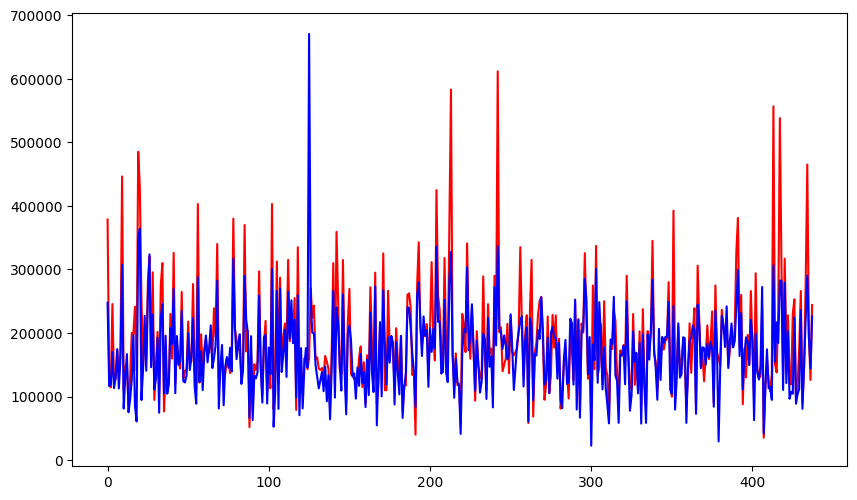

In [13]:
X = train_df.drop(["SalePrice","Id"], axis=1)
Y = train_df["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

from sklearn.svm import LinearSVR
regr = LinearSVR()
regr.fit(x_train, y_train)
pred = regr.predict(x_test)

plt.figure(figsize=(10,6), dpi=100)
plt.plot(np.array(y_test), c='r')
plt.plot(pred, c='b')
# plt.savefig('start_scaling.png')
plt.show()

In [14]:
X_test =  test_df.drop("Id", axis=1)

regr.fit(X, Y)
Y_pred = regr.predict(X_test)
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': Y_pred})
output.to_csv('allfeatures1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
